# **Chaînes de Markov : propagation d'une épidémie dans une population**

(Import pour la suite du projet)


In [143]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
import random

## 1 - Description du premier modèle


1. Il y'a 3 états dans le modèle présenté. La taille du vecteur initial est égale à 3 (3 états) et la matrice de transition comporte 3 lignes et 3 colonnes.

2. le vecteur $ \pi_0 $ de probabilité initiale est : $ \mathbf{\pi_0 } = \begin{bmatrix} 0.9 \\ 0.1 \\ 1 \end{bmatrix}  $

3. La matrice de transition A est : A = $  \begin{bmatrix} 0.92 & 0.08 & 0 \\ 0 & 0.93 & 0.07 \\ 0 & 0 & 1 \end{bmatrix} $ 

4. Creation d'une fonction  permettant de vérifier qu’une matrice est stochastique et vérifier que A est stochastique :

In [144]:

def est_stochastique(matrice):
    """
    Retourne 1 si la matrice est stochastique, 0 sinon
    """
    if (matrice<0).any():
        return 0
    
    ligne, colonne = matrice.shape
    
    if (ligne != colonne):
        return 0
    
    if not np.allclose(matrice.sum(axis=1), np.ones(ligne)):
        return 0
    
    return 1


In [145]:
a = np.array([[0.92,0.08,0],[0,0.93,0.07], [0,0,1]])
est_stochastique(a)

print(a)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


### 1.1 - Distribution théorique


1. le vecteur $ \pi_1 $ de probabilité au teps t=1 est : $ \begin{bmatrix} 0.9 \times 0.92 & 0.9 \times 0.08 + 0.1 \times 0.93 & 0.1 \times 0.07 \end{bmatrix} = \begin{bmatrix} 0.828 \\ 0.165 \\ 0.007 \end{bmatrix}  $

     la probabilité pour un individu d’être sain au temps t=1 est : $ P(X_1 = S) = 0.828  $
      
     la probabilité pour un individu d’être infecté au temps t=1 :  $ P(X_1 = I) = 0.165  $
     
     la probabilité pour un individu d’être guéri au temps t=1 est : $ P(X_1 = G) = 0.007   $

2. Le vecteur $ \pi_2 $ de probabilité au teps t=1 est :  $ \begin{bmatrix} 0.828 \times 0.92  & 0.828 \times 0.08 + 0.165 \times 0.93 & 0.165 \times 0.07 + 0.007 \times 1 \end{bmatrix} = \mathbf{\pi_2 } = \begin{bmatrix} 0.76176 \\ 0.21969 \\ 0.01855
\end{bmatrix}  $

     la probabilité pour un individu d’être sain au temps t=2 est : $ P(X_2 = S) = 0.76176   $
  
     la probabilité pour un individu d’être infecté au temps t=2 :  $ P(X_2 = I) = 0.21969  $
  
     la probabilité pour un individu d’être guéri au temps t=2 est : $ P(X_2 = G) = 0.01855  $

In [146]:
def Produit_matrice_vecteur(vecteur_init,matrice,t):
    result = vecteur_init
    for i in range(0,t):
        result=np.dot(result,matrice)
    return result

In [147]:
# Definition de la matrice de transaction et le vecteur 𝜋0 de probabilité initiale
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
# Le vecteur de probabilité au temps t=1 en multipliant t1 par A
t1 = Produit_matrice_vecteur(vecteur_initial,matrice_transition,1)
print(t1)

# Le vecteur de probabilité au temps t=1 en multipliant t1 par A
t2 = Produit_matrice_vecteur(vecteur_initial,matrice_transition,2)
print(t2)
        
        

[0.828 0.165 0.007]
[0.76176 0.21969 0.01855]


3. Pour calculer la distribution théorique des effectifs dans chaque états, on code une fonction qui va multiplier le vecteur de probabilité $\pi{_i}$ au temps $t_i$:

In [148]:
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
distribution_theorique =[]
for i in range(1, 201):
    t = Produit_matrice_vecteur(vecteur_initial, matrice_transition,i)
    distribution_theorique.append(t)
    print(t)
# pas besoin de mettre à jour le vecteur initiale dans cette fonction, c'est parceque je le fais dans ma fonction Produit_matrice_vecteur(result = vecteur_init)  

[0.828 0.165 0.007]
[0.76176 0.21969 0.01855]
[0.7008192 0.2652525 0.0339283]
[0.64475366 0.30275036 0.05249598]
[0.59317337 0.33313813 0.0736885 ]
[0.5457195  0.35727233 0.09700817]
[0.50206194 0.37592083 0.12201723]
[0.46189699 0.38977132 0.14833169]
[0.42494523 0.39943909 0.17561568]
[0.39094961 0.40547397 0.20357642]
[0.35967364 0.40836676 0.2319596 ]
[0.33089975 0.40855498 0.26054527]
[0.30442777 0.40642811 0.28914412]
[0.28007355 0.40233237 0.31759409]
[0.25766766 0.39657498 0.34575735]
[0.23705425 0.38942815 0.3735176 ]
[0.21808991 0.38113252 0.40077757]
[0.20064272 0.37190043 0.42745685]
[0.1845913  0.36191882 0.45348988]
[0.169824   0.35135181 0.4788242 ]
[0.15623808 0.3403431  0.50341882]
[0.14373903 0.32901813 0.52724284]
[0.13223991 0.31748598 0.55027411]
[0.12166072 0.30584116 0.57249813]
[0.11192786 0.29416513 0.59390701]
[0.10297363 0.2825278  0.61449857]
[0.09473574 0.27098875 0.63427551]
[0.08715688 0.25959839 0.65324473]
[0.08018433 0.24839906 0.67141661]
[0.07376958 

4. Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps

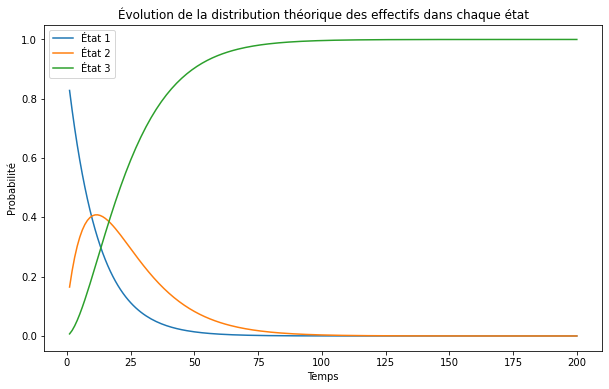

In [149]:
distribution_theorique = np.array(distribution_theorique)
plt.figure(figsize=(10, 6))

for etat in range(len(vecteur_initial)):
    plt.plot(range(1, 201), distribution_theorique[:, etat], label=f'État {etat + 1}')
    
plt.legend()
plt.title('Évolution de la distribution théorique des effectifs dans chaque état')
plt.xlabel('Temps')
plt.ylabel('Probabilité')

plt.show()


### 1.2 Distribution observée

### 1.2.1 Tirage aléatoire des états


In [150]:
def  générer_séquence(T,vecteur_init,matrice):
    # Choisir un état initial au hasard en utilisant les probabilités de π0
    etats_labels = ["S", "I", "R"]
    sequence = [etats_labels[np.random.choice(len(vecteur_init), p=vecteur_init)]]
    # choisir chaque état suivant en utilisant les probabilités de transition définies par la matrice de transition
    for t in range(1,T):
        # Récupèrer le dernier état ajouté à la séquence
        etat_actuel = sequence[-1]
        # Extrait la ligne de la matrice de transition  correspondant à l'état actuel. Cela donne les probabilités de transition de l'état actuel vers tous les autres états
        prob_transition = matrice[etats_labels.index(etat_actuel), :]
        # Tirer au hasard le prochain état en fonction des probabilités de transition
        prob_transition /= np.sum(prob_transition)
        prochain_etat = np.random.choice(etats_labels, p=prob_transition)
        # Ajouter le prochain état à la séquence, complétant ainsi l'itération de la boucle
        sequence.append(prochain_etat)
    return sequence

In [151]:
T = 150
générer_séquence(T,vecteur_initial,matrice_transition)

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

### 1.2.2 Modélisation d’une population

Évolution d'une population de 200 individus

In [152]:
def Evolution_sequences(nombre_individus, matrice, T,vecteur_init):
    sequences = []
    for i in range(0,nombre_individus):
        # Génération de la séquence pour chaque individu dans la population
        sequences.append(générer_séquence(T, vecteur_init, matrice))
    nb_sain, nb_infecté, nb_guéri = np.zeros(T), np.zeros(T), np.zeros(T)
    for t in range(T):
        for sequence in sequences:
            if sequence [t] == "S":
                nb_sain[t] += 1
            elif sequence [t] == "I":
                nb_infecté[t] += 1
            elif sequence [t] == "R":
                nb_guéri[t] += 1
                
                
    # affichez l'évolution du nombre d'individus dans les trois états en fonction du temps
    plt.figure(figsize=(10, 8))
    ax1 = plt.subplot(221)

    ax1.plot(nb_sain, c="blue", label="etat S")
    ax1.plot(nb_infecté, c="orange", label="etat I")
    ax1.plot(nb_guéri, c="green", label="etat R")

    ax1.set_title("Repartition theorique des effectifs ")
    ax1.legend(loc="center right")
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.show()
    
    
    #  Affichez le pourcentage d'individus sains, infectés et guéris en fonction du temps
    Pourcentage_sain = nb_sain/nombre_individus; Pourcentage_infecté = nb_infecté/nombre_individus; Pourcentage_guéri = nb_guéri/nombre_individus
    
    plt.figure(figsize=(11, 8))
    ax1 = plt.subplot(221)

    ax1.plot(Pourcentage_sain, c="blue", label="pourcentage d'individu sain")
    ax1.plot(Pourcentage_infecté, c="orange", label="pourcentage d'individu infecté")
    ax1.plot(Pourcentage_guéri, c="green", label="pourcentage d'individu guéri")

    ax1.set_title(f"Distribution observé sur une population de {nombre_individus}  individus")
    ax1.legend(loc="center right")


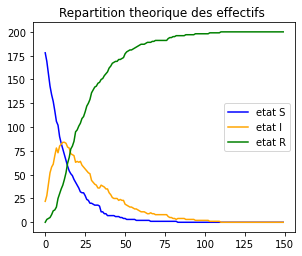

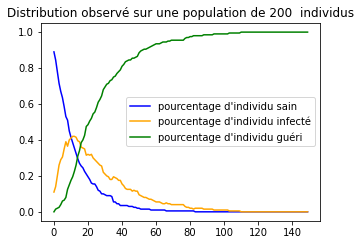

In [153]:
T = 150
nombre_individus = 200
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

seq = Evolution_sequences(nombre_individus, matrice_transition, T,vecteur_initial)

Remarque:
    
À partir des graphes simulés ci-dessous, on peut observer que plus t est grand,  la proportion d'individus sains et infectés diminue et  s'approche de 0 .En revanche, la proportion d'individus guéris se converge vers .





Évolution d'une population de 5 individus

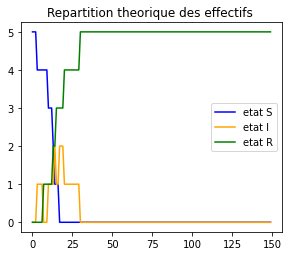

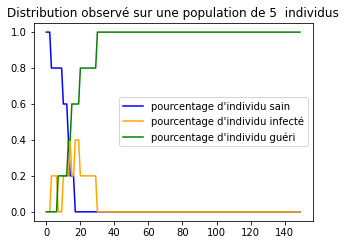

In [154]:
T = 150
nombre_individus = 5
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

seq = Evolution_sequences(nombre_individus, matrice_transition, T,vecteur_initial)

Évolution d'une population de 5 individus

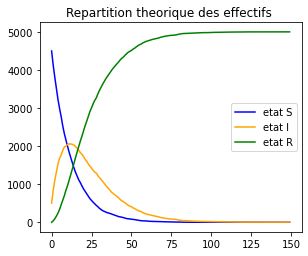

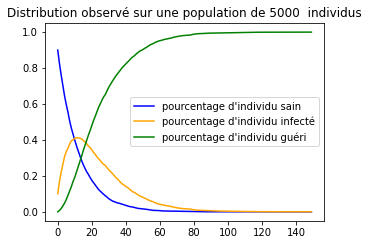

In [155]:
T = 150
nombre_individus = 5000
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

seq = Evolution_sequences(nombre_individus, matrice_transition, T,vecteur_initial)

### 1.3 Longueur de l’infection

- la sequence I est la période pendant laquelle l'individu est infecté avant de passer à l'etat suivant 

- pour estimer la moyenne de cette période dans une chaine de Markov on peut utiliser la distribution geometrique (loi géometrique)

- la loi geometrique décrit le nombre d'étapes nécessaires pour atteindre un événement spécifique pour la première fois

- Dans une chaîne de Markov, la durée dans un état suit une distribution géométrique lorsqu'on estime la durée avant la prochaine transition vers un autre état.

In [156]:
def infection_longueure(T, nombre_individus, vecteur_init, matrice):
    lengueurs = []

    for i in range(nombre_individus):
        sequence = générer_séquence(T, vecteur_init, matrice)
        lengueure_I = sequence.count("I")
        lengueurs.append(lengueure_I)

    return lengueurs
        

In [157]:
T = 200
nombre_individus = 1000
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

I = infection_longueure(T, nombre_individus, vecteur_initial, matrice_transition)
print("I =", I)

# 1. Estimez la longueur moyenne d'une séquence de I
moyenne_estimée = np.mean(I)
print("Moyenne estimée = :", moyenne_estimée )


# 2. Calculez la longueur théorique d'une séquence de I
p = 1-matrice_transition[1][1]

# Calcul de la moyenne du nombre d'étapes passées dans l'état infecté
moyenne_theorique = 1/p     # Espérance de la loi géométrique
print("Moyenne théorique =", moyenne_theorique)

I = [28, 33, 1, 17, 17, 6, 24, 5, 18, 47, 16, 12, 2, 3, 5, 26, 24, 15, 12, 9, 22, 42, 5, 16, 7, 8, 10, 8, 2, 16, 17, 3, 3, 20, 14, 3, 14, 6, 15, 2, 3, 80, 22, 2, 25, 10, 10, 34, 8, 49, 26, 14, 30, 5, 36, 10, 14, 14, 1, 2, 5, 4, 17, 23, 42, 11, 7, 1, 6, 6, 9, 4, 9, 6, 7, 11, 29, 4, 5, 3, 7, 8, 4, 1, 12, 14, 6, 56, 48, 1, 9, 39, 1, 18, 10, 31, 24, 20, 11, 8, 18, 4, 11, 1, 21, 1, 9, 42, 2, 6, 20, 14, 30, 4, 24, 5, 7, 52, 21, 1, 29, 6, 2, 3, 8, 5, 1, 12, 1, 5, 23, 5, 24, 10, 40, 13, 3, 37, 52, 33, 11, 6, 18, 5, 33, 21, 23, 10, 5, 4, 5, 1, 15, 12, 3, 9, 22, 37, 2, 54, 3, 19, 81, 18, 31, 3, 16, 12, 33, 10, 17, 6, 19, 37, 48, 5, 5, 17, 5, 1, 7, 15, 2, 33, 5, 9, 17, 9, 15, 3, 16, 46, 33, 23, 17, 10, 8, 47, 1, 8, 1, 4, 16, 1, 3, 10, 29, 2, 4, 38, 5, 9, 10, 16, 19, 4, 6, 22, 18, 32, 11, 46, 7, 3, 5, 10, 1, 4, 6, 6, 6, 19, 17, 23, 3, 1, 1, 5, 19, 2, 8, 10, 12, 21, 1, 27, 1, 6, 34, 9, 8, 6, 17, 32, 3, 7, 10, 27, 7, 12, 9, 10, 11, 3, 10, 23, 25, 3, 5, 16, 2, 6, 29, 11, 37, 2, 21, 1, 9, 3, 30, 6, 2,

- Remarque 1:

   À partir des estimations ci-dessus, on obtient 14.574 pour la moyenne observée et environ 14.28 pour la moyenne théorique de l'état La moyenne théorique de la durée dans "Infecté" utilise la formule de la distribution géométrique pour cette probabilité spécifique: $\frac{1}{1 - \text{P(I}\rightarrow\text{S)}}$

.
- Remarque 2:
    
   plus j'augmente ma population, plus la moyenne observeé est proche de la moyenne théorique 

Text(0.5, 1.0, 'Histogramme distribution observée')

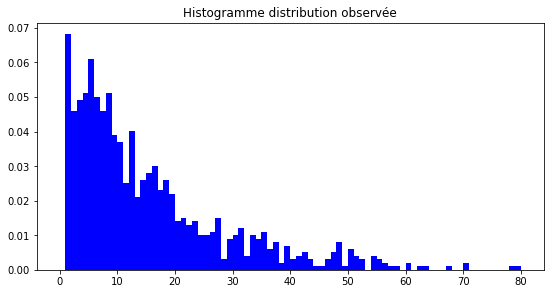

In [158]:
# 4. Afficher la distribution observée de la longueur d'infection (un histogramme)
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.hist(I, bins=range(0, np.max(I), 1), density=True, color="blue")
ax1.set_title("Histogramme distribution observée")

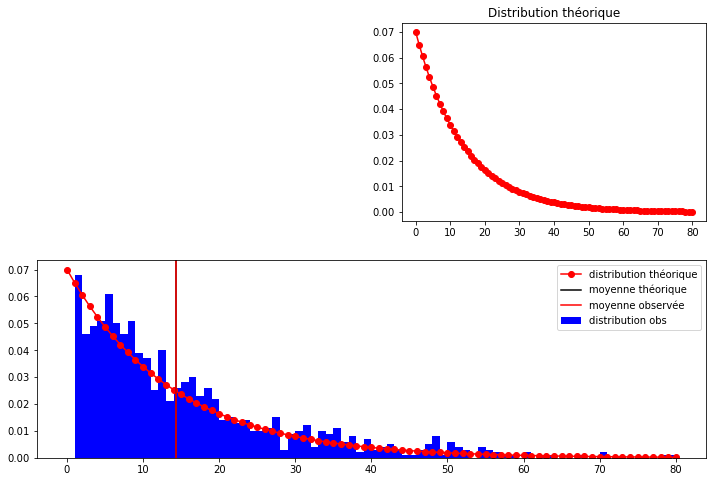

In [159]:
# 5. Affichez et superposer la distribution théorique de la longueur d’infection et la distribution observée.
plt.figure(figsize=(12, 8)) 

ax2 = plt.subplot(222)
sequence = []
for k in range(max(I)) : 
      sequence.append((1-p)**k * p)

ax2.plot(range(max(I)), sequence,'ro-')
ax2.set_title("Distribution théorique")


ax3 = plt.subplot(212)
ax3.hist(I, bins=range(0, np.max(I), 1), density=True, color="blue", label="distribution obs")
ax3.plot(range(max(I)), sequence,'ro-', label="distribution théorique")
ax3.axvline(x=moyenne_theorique, color='black', label='moyenne théorique')
ax3.axvline(x=moyenne_observée, color='red', label='moyenne observée')

ax3.legend(loc="upper right")

### 1.4 Apprentissage des paramètres du modèle à partir de données

In [160]:
def determine_matrice_transition(T, nombre_individus, vecteur_init, matrice):
    matrice_transition = [[0] * 3 for _ in range(3)]

    for i in range(nombre_individus):
        sequence = générer_séquence(T, vecteur_init, matrice)

        for j in range(len(sequence) - 1):
            etat_actuel = etats_labels.index(sequence[j])
            etat_suivant = etats_labels.index(sequence[j + 1])
            matrice_transition[etat_actuel][etat_suivant] += 1

    for row in matrice_transition:
        total_transitions = sum(row)
        if total_transitions > 0:
            row[:] = [count / total_transitions for count in row]

    return matrice_transition

In [161]:
T = 200
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
etats_labels = ["S", "I", "R"]

print("La matrice de transition A :")

# nb_indiv = 1
Matrice = determine_matrice_transition(T,1,vecteur_initial,matrice_transition)
print("Quand le nombre d'individu = 1 :", Matrice)

# nb_indiv = 10
Matrice = determine_matrice_transition(T,10,vecteur_initial,matrice_transition)
print("Quand le nombre d'individu = 10 :", Matrice)

# nb_indiv = 30
Matrice = determine_matrice_transition(T,30,vecteur_initial,matrice_transition)
print("Quand le nombre d'individu = 30 :", Matrice)


# nb_indiv = 100
Matrice = determine_matrice_transition(T,100,vecteur_initial,matrice_transition)
print("Quand le nombre d'individu = 100 :", Matrice)


# nb_indiv = 1000
Matrice = determine_matrice_transition(T,1000,vecteur_initial,matrice_transition)
print("Quand le nombre d'individu = 1000 :", Matrice)


La matrice de transition A :
Quand le nombre d'individu = 1 : [[0.9166666666666666, 0.08333333333333333, 0.0], [0.0, 0.9166666666666666, 0.08333333333333333], [0.0, 0.0, 1.0]]
Quand le nombre d'individu = 10 : [[0.94375, 0.05625, 0.0], [0.0, 0.9386503067484663, 0.06134969325153374], [0.0, 0.0, 1.0]]
Quand le nombre d'individu = 30 : [[0.9197707736389685, 0.08022922636103152, 0.0], [0.0, 0.943289224952741, 0.05671077504725898], [0.0, 0.0, 1.0]]
Quand le nombre d'individu = 100 : [[0.921619293712317, 0.07838070628768304, 0.0], [0.0, 0.9227202472952086, 0.07727975270479134], [0.0, 0.0, 1.0]]
Quand le nombre d'individu = 1000 : [[0.9237151807636949, 0.07628481923630515, 0.0], [0.0, 0.9265569917743831, 0.07344300822561692], [0.0, 0.0, 1.0]]


- Remarque:
    D'aprées des matrices de probabilité de transitions estimées ci-dessus,pour approximer correctement le modèle d'au moins 30 individus 
     

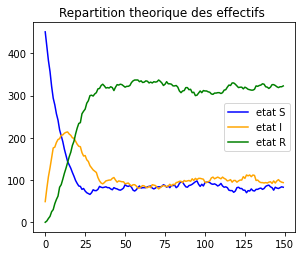

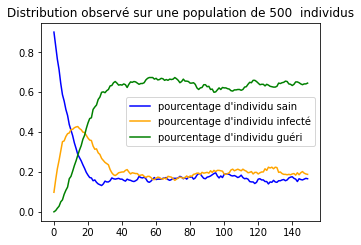

In [162]:
T = 150
nombre_individus = 500
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]])

Evolution_sequences(nombre_individus, matrice_transition, T,vecteur_initial)

## 4- Confinement

En période de non-confinement, nous utilisons la matrice de transition de l’exercice 2 ;

In [236]:
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])

En période de confinement, la probabilité de devenir infecté pour un individu sain devient nulle;

In [237]:
matrice_transition_avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])

In [238]:
def simulation(matrice_transition_SC , matrice_transition_AC, etat_init, nombre_individus, T, containment_threshold=0.25, exit_threshold=0.1):
    etat = etat_init
    num_containments = 0
    # Liste pour stocker les temps de chaque fin de confinement/déconfinement
    temps = [] 
    # Liste pour stocker les états de la population à chaque fin de confinement/déconfinement
    etats = [] 
    for t in range(T):
        # Calculer la probabilité de passer à chaque état
        probability_of_state_change = etat.dot(matrice_transition_SC)

        # Si le pourcentage d'individus infectés dépasse le seuil de confinement, passer à la matrice de confinement
        if  etat[1] > containment_threshold:
            matrice_transition_SC = matrice_transition_AC
            num_containments += 1
        # Si le pourcentage d'individus infectés est inférieur au seuil de sortie, retourner à la matrice de transition initiale
        elif etat[1] < exit_threshold:
            matrice_transition_SC = matrice_transition_initiale
        
        # Passer à l'état suivant en fonction de la probabilité de changement d'état
        etat = np.random.multinomial(nombre_individus, probability_of_state_change).astype(float) / nombre_individus
        
        # Ajouter le temps et l'état de la population à chaque fin de confinement/déconfinement
        temps.append(t)
        etats.append( etat)
        
        # Si aucun individu n'est infecté, sortir de la boucle
        if etat[1] == 0:
            break
    
    # Afficher un graphe des vagues de confinement/déconfinement
    fig, ax = plt.subplots()
    ax.plot(temps, etats)
    
    # Tracer un trait vertical pour séparer chaque vague de confinement/déconfinement
    for t in temps[::num_containments]:
        ax.axvline(t, linestyle='--', color='gray')
    
    title_str = (f"Distribution observé sur une population de {nombre_individus}  individus")
    ax.set_title(title_str)
    
    plt.show()
    
    return etat, num_containments/2
    
    


Évolution d'une population de 1000 individus

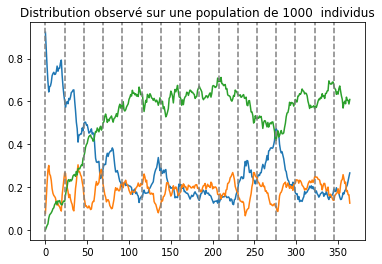

Nombre de confinements/déconfinements nécessaires : 11.5


In [239]:
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_initiale = matrice_transition_sans_confinement
etat_initial = np.array([1, 0, 0])                            # 100% de la population est saine au départ
nombre_individus = 1000                                        # Taille de l'echantillon
T = 365                                                        # duree de l'etudes (en jours)
etat_final, num_containments = simulation(matrice_transition_sans_confinement , matrice_transition_avec_confinement, etat_initial, nombre_individus, T, containment_threshold=0.25, exit_threshold=0.1)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

Évolution d'une population de 20000 individus

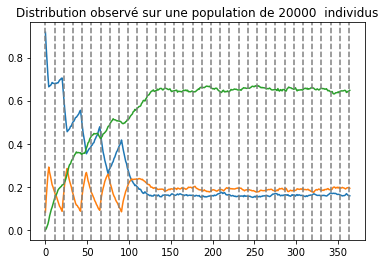

Nombre de confinements/déconfinements nécessaires : 5.5


In [241]:
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_initiale = matrice_transition_sans_confinement
etat_initial = np.array([1, 0, 0])                            # 100% de la population est saine au départ
nombre_individus = 20000                                        # Taille de l'echantillon
T = 365                                                        # duree de l'etudes (en jours)
etat_final, num_containments = simulation(matrice_transition_sans_confinement , matrice_transition_avec_confinement, etat_initial, nombre_individus, T, containment_threshold=0.25, exit_threshold=0.1)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

Évolution d'une population de 50000 individus

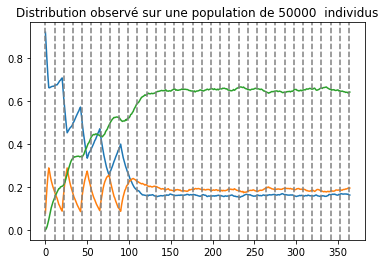

Nombre de confinements/déconfinements nécessaires : 5.5


In [242]:
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_initiale = matrice_transition_sans_confinement
etat_initial = np.array([1, 0, 0])                            # 100% de la population est saine au départ
nombre_individus = 50000                                        # Taille de l'echantillon
T = 365                                                        # duree de l'etudes (en jours)
etat_final, num_containments = simulation(matrice_transition_sans_confinement , matrice_transition_avec_confinement, etat_initial, nombre_individus, T, containment_threshold=0.25, exit_threshold=0.1)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

   
   On observe plusieurs pics dans la distribution observée pour le poucentage d'individus sains et infectés. Ces pics correspondent aux débuts et fins des confinement qui ont eu lieu. Les pics d'infections sont les débuts de confinement et les pics d'individus sains les fins de confinement.

## 5- Discussion